# 电商数据分析


## 数据集介绍

巴西电子商务平台 Olist Store从2016年至2018年之间10万多条的订单交易数据。数据已脱敏。
 
- 数据集来源：[Kaggle 公开数据集](https://www.kaggle.com/olistbr/brazilian-ecommerce)
- 该数据集包含9个文件


文件 | 说明
-|-
olist_customers_dataset.csv | 客户及其位置的信息
olist_geolocation_dataset.csv |巴西邮政编码及其纬度/经度坐标信息
olist_Order Items Dataset.csv|每个订单中购买的商品的数据
olist_Payments Dataset.csv|订单付款选项的数据
olist_Order Reviews Dataset.csv|客户所做评论的数据
olist_Order Dataset.csv|订单交易数据
olist_Products Dataset.csv|Olist销售的产品的数据
olist_Sellers Dataset.csv| Olist完成订单的卖家的数据。
product_Category Name Translation.csv|将商品名从葡萄牙语翻译为英语

各表之间的关系如下：

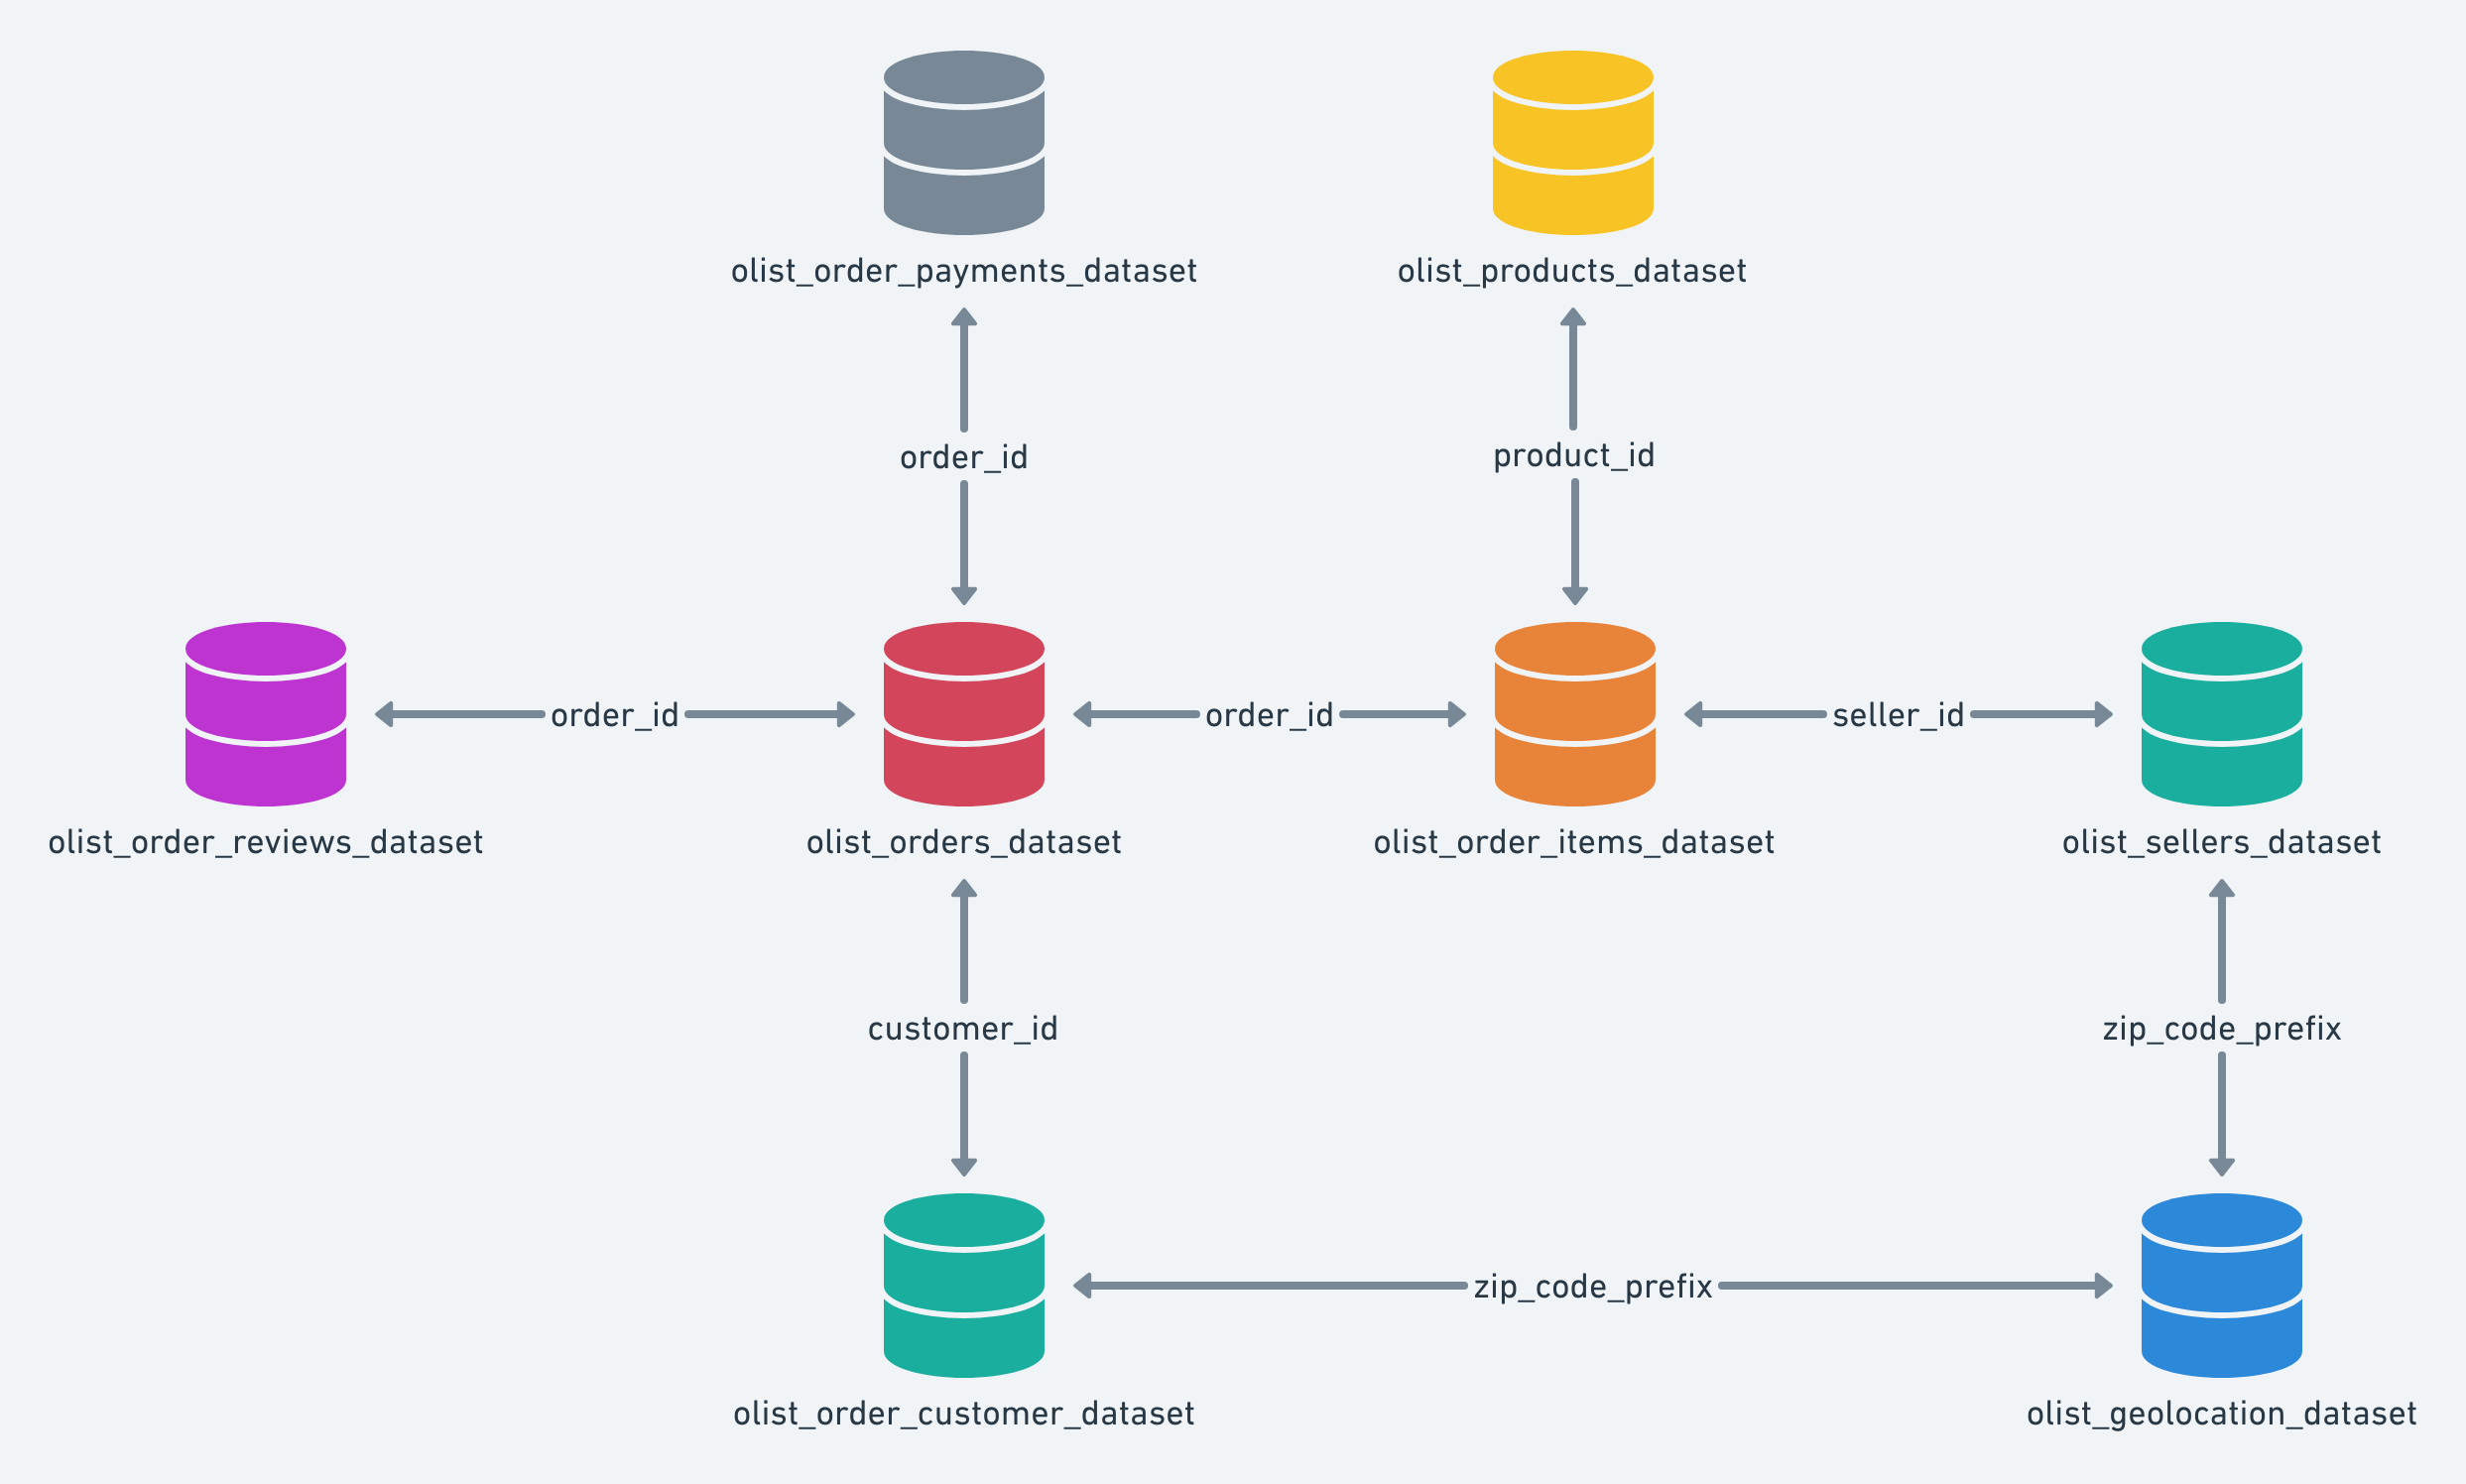


## 代码实现

### 导入相关库

In [145]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性
import os

        
# 在 jupyter notebook 里面显示图表
%matplotlib inline 

### 关联数据

In [146]:
# 目录下所有 CSV 文件
table_list= [filename for filename in os.listdir('.') if filename.endswith('.csv') ]
print(table_list)

['olist_sellers_dataset.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'ecommerce_data.csv', 'olist_products_dataset.csv']


In [147]:
# 获取数据集
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
pro_trans = pd.read_csv("product_category_name_translation.csv")

# 合并数据集
res1 = pd.merge(orders,payments, on='order_id',how='left')
res2 =  pd.merge(res1,customers, on='customer_id',how='left')
res3 = pd.merge(res2,reviews, on='order_id',how='left')
res4 = pd.merge(res3,order_items, on='order_id',how='left')
res5 = pd.merge(res4,products, on='product_id',how='left')
res6 = pd.merge(res5,seller, on='seller_id',how='left')
data = pd.merge(res6,pro_trans, on='product_category_name',how='left')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   customer_id                    119151 non-null  object 
 2   order_status                   119151 non-null  object 
 3   order_purchase_timestamp       119151 non-null  object 
 4   order_approved_at              118974 non-null  object 
 5   order_delivered_carrier_date   117065 non-null  object 
 6   order_delivered_customer_date  115730 non-null  object 
 7   order_estimated_delivery_date  119151 non-null  object 
 8   payment_sequential             119148 non-null  float64
 9   payment_type                   119148 non-null  object 
 10  payment_installments           119148 non-null  float64
 11  payment_value                  119148 non-null  float64
 12  customer_unique_id            

### 理解数据

In [148]:
data.head() # 数据集前5行

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [149]:
data.columns.values # 所有字段

array(['order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'], dtype=object)

通过预览数据，了解所有字段和其含义。

字段 | 说明
-|-
product_id|商品ID
seller_id|商家ID
order_id|订单ID
customer_id|订单对应的用户ID（每个订单有一个唯一的customer_id）
order_status|订单状态 [delivered(已送达)\shipped(已发货)\canceled(已取消)\unavailable(无效)\invoiced(已开票)]
order_purchase_timestamp|下单时间
order_approved_at|付款时间
order_delivered_carrier_date|快递揽收日期
order_delivered_customer_date|订单送达日期
order_estimated_delivery_date|预计送达日期
customer_unique_id|客户唯一标识符
customer_zip_code_prefix|客户邮政编码前5位
customer_city|客户所在城市
customer_state|客户所在的州
review_id|评论ID
review_score|评价得分，客户在满意度调查中给出的注释范围为1到5。
review_comment_title|评论标题（葡萄牙语）
review_comment_message|评论内容（葡萄牙语）
review_creation_date|发出满意度调查日期
review_answer_timestamp|客户满意度回复日期
payment_sequential|付款序列(客户可以使用多种付款方式支付同一个订单，付款序列标明所有付款方式）
payment_type|付款方式
payment_installments|分期付款期数
payment_value|交易金额
order_item_id|序号，用于标识同一订单中包含的商品数量。 
price|商品价格
freight_value|单个商品的运费（如果订单包含多个商品，总运费平摊到每个商品中）
shipping_limit_date|显示将订单处理到物流合作伙伴的卖家发货限制日期
seller_zip_code_prefix|卖家邮政编码前5位
seller_city|卖家所在城市
seller_state|卖家所在州 
product_category_name|产品品类名称（葡萄牙语）
product_category_name_english|产品品类名称（英语）
product_name_lenght|产品名称长度
product_description_lenght|产品说明长度
product_photos_qty|产品照片数量
product_weight_g|产品重量单位g
product_length_cm|产品长度单位cm
product_height_cm|产品高度单位cm
product_width_cm|产品宽度单位cm

### 电商数据分析指标框架

### 数据清洗

#### 选取子集
根据指标框架选取需要的字段，作为新的数据表

In [150]:
# 按需选取相应字段
commerce_data = data[['product_id','seller_id','order_id','order_item_id','customer_unique_id','order_status','order_purchase_timestamp','order_approved_at','order_delivered_customer_date',
                    'order_estimated_delivery_date','customer_city','customer_state','seller_city','seller_state','review_score','review_creation_date',
                    'review_answer_timestamp','payment_type','payment_installments','payment_value','product_category_name_english']]
 
print(commerce_data.shape)
commerce_data.head()

(119151, 21)


,product_id,seller_id,order_id,order_item_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,customer_state,seller_city,seller_state,review_score,review_creation_date,review_answer_timestamp,payment_type,payment_installments,payment_value,product_category_name_english
0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,e481f51cbdc54678b7cc49136f2d6af7,1.0,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,...,SP,maua,SP,4,2017-10-11 00:00:00,2017-10-12 03:43:48,credit_card,1.0,18.12,housewares
1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,e481f51cbdc54678b7cc49136f2d6af7,1.0,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,...,SP,maua,SP,4,2017-10-11 00:00:00,2017-10-12 03:43:48,voucher,1.0,2.00,housewares
2,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,e481f51cbdc54678b7cc49136f2d6af7,1.0,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,...,SP,maua,SP,4,2017-10-11 00:00:00,2017-10-12 03:43:48,voucher,1.0,18.59,housewares
3,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,53cdb2fc8bc7dce0b6741e2150273451,1.0,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,...,BA,belo horizonte,SP,4,2018-08-08 00:00:00,2018-08-08 18:37:50,boleto,1.0,141.46,perfumery
4,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,47770eb9100c2d0c44946d9cf07ec65d,1.0,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,...,GO,guariba,SP,5,2018-08-18 00:00:00,2018-08-22 19:07:58,credit_card,3.0,179.12,auto


#### 缺失值

缺失情况：缺失值数量、占比

In [152]:
# 缺失值统计
null_data = commerce_data.isnull().sum().sort_values(ascending=False)
percent_1 = commerce_data.isnull().sum()/commerce_data.isnull().count()
missing_data = pd.concat([null_data,percent_1.apply(lambda x: format(x, '.2%'))],axis=1,keys=['total missing','missing percentage'])
missing_data.head(15)

,total missing,missing percentage
order_delivered_customer_date,3421,2.87%
product_category_name_english,2567,2.15%
seller_state,833,0.70%
seller_id,833,0.70%
order_item_id,833,0.70%
seller_city,833,0.70%
product_id,833,0.70%
order_approved_at,177,0.15%
payment_value,3,0.00%
payment_type,3,0.00%


缺失值处理：

- order_delivered_customer_date、product_category_name_english 字段缺失值数量为3421和2567，相对其他缺失数据较多，但是与整体数据相比较少，可直接选择删除缺失值。
- seller_state、seller_id、order_item_id、seller_city、product_id、payment_installments、payment_type、payment_value 的缺失值与整体数据相比就更少了，亦可删除。

In [153]:
# 删除缺失值
commerce_data = commerce_data.dropna()
commerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114052 entries, 0 to 119150
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     114052 non-null  object 
 1   seller_id                      114052 non-null  object 
 2   order_id                       114052 non-null  object 
 3   order_item_id                  114052 non-null  float64
 4   customer_unique_id             114052 non-null  object 
 5   order_status                   114052 non-null  object 
 6   order_purchase_timestamp       114052 non-null  object 
 7   order_approved_at              114052 non-null  object 
 8   order_delivered_customer_date  114052 non-null  object 
 9   order_estimated_delivery_date  114052 non-null  object 
 10  customer_city                  114052 non-null  object 
 11  customer_state                 114052 non-null  object 
 12  seller_city                   

处理完的数据共有114052条

#### 异常值

查看异常情况

In [155]:
commerce_data.describe()

,order_item_id,review_score,payment_installments,payment_value
count,114052.000000,114052.000000,114052.000000,114052.000000
mean,1.197515,4.067259,2.946656,172.138953
std,0.703178,1.357814,2.781812,266.153061
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,60.957500
50%,1.000000,5.000000,2.000000,108.065000
75%,1.000000,5.000000,4.000000,189.370000
max,21.000000,5.000000,24.000000,13664.080000


异常值情况

我们知道付款有一次性付款付清也有分期付款，而分期付款一般有3、6、12、24期等。

- 分期付款期数最小值为0。分期付款期数为1时，说明用户是一次性付清，没有分期。所以这里为0是异常值
- 交易金额应该大于0。

In [156]:
# 浏览异常值数据：分期付款期数
commerce_data[commerce_data['payment_installments']==0]

,product_id,seller_id,order_id,order_item_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,customer_state,seller_city,seller_state,review_score,review_creation_date,review_answer_timestamp,payment_type,payment_installments,payment_value,product_category_name_english
76235,0cf573090c66bb30ac5e53c82bdb0403,7202e2ba20579a9bd1acb29e61fe71f6,744bade1fcf9ff3f31d860ace076d422,1.0,f54cea27c80dc09bfe07b1cf1e01b845,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-27 20:55:28,2018-05-16 00:00:00,...,SP,franca,SP,5,2018-04-28 00:00:00,2018-04-29 17:43:50,credit_card,0.0,58.69,telephony
79383,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,1a57108394169c0b47d8f876acc9ba2d,1.0,9925e1d7dff0d807355599dee04830ab,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-24 15:45:41,2018-06-06 00:00:00,...,BA,belo horizonte,MG,5,2018-05-25 00:00:00,2018-05-26 00:24:28,credit_card,0.0,129.94,housewares
79384,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,1a57108394169c0b47d8f876acc9ba2d,2.0,9925e1d7dff0d807355599dee04830ab,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-24 15:45:41,2018-06-06 00:00:00,...,BA,belo horizonte,MG,5,2018-05-25 00:00:00,2018-05-26 00:24:28,credit_card,0.0,129.94,housewares


In [157]:
# 浏览异常值数据：交易金额
commerce_data[commerce_data['payment_value']==0]

,product_id,seller_id,order_id,order_item_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,customer_state,seller_city,seller_state,review_score,review_creation_date,review_answer_timestamp,payment_type,payment_installments,payment_value,product_category_name_english
504,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,45ed6e85398a87c253db47c2d9f48216,1.0,e4000306cf2f63714e6bb70dd20a6592,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-22 17:44:53,2017-07-10 00:00:00,...,GO,santo andre,SP,1,2017-06-23 00:00:00,2017-06-27 16:19:05,voucher,1.0,0.0,perfumery
38758,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,6ccb433e00daae1283ccc956189c82ae,1.0,677ad9cdca6c47c733f0cc6e23d7bb4c,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-11-08 18:47:00,2017-11-22 00:00:00,...,RJ,igrejinha,RS,4,2017-11-09 00:00:00,2018-02-14 13:57:57,voucher,1.0,0.0,sports_leisure
102651,e306ca54c91b21392317d5b4632c9fe3,e49c26c3edfa46d227d5121a6b6e4d37,b23878b3e8eb4d25a158f57d96331b18,1.0,9077449283dc1319d5e51fb3159b28e2,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-06-07 08:53:10,2017-06-29 00:00:00,...,ES,brejao,PE,5,2017-06-08 00:00:00,2017-06-10 19:28:35,voucher,1.0,0.0,consoles_games
116147,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,8bcbe01d44d147f901cd3192671144db,1.0,cc5aa1b8337e394da54980226bb0f6d4,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-02-02 21:26:42,2018-02-21 00:00:00,...,RJ,campo limpo paulista,SP,4,2018-02-03 00:00:00,2018-02-11 17:34:29,voucher,1.0,0.0,stationery


处理异常值

异常数据加起来一共7条，可直接进行删除

In [158]:
# 删除异常值
commerce_data=commerce_data.drop(index=commerce_data[commerce_data['payment_installments']==0].index)
commerce_data=commerce_data.drop(index=commerce_data[commerce_data['payment_value']==0].index)
commerce_data.describe()

,order_item_id,review_score,payment_installments,payment_value
count,114045.000000,114045.000000,114045.000000,114045.000000
mean,1.197519,4.067254,2.946802,172.146725
std,0.703194,1.357814,2.781833,266.159006
min,1.000000,1.000000,1.000000,0.010000
25%,1.000000,4.000000,1.000000,60.970000
50%,1.000000,5.000000,2.000000,108.070000
75%,1.000000,5.000000,4.000000,189.370000
max,21.000000,5.000000,24.000000,13664.080000


#### 重复值

In [159]:
# 去重处理
commerce_data = commerce_data.drop_duplicates()
commerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113398 entries, 0 to 119150
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     113398 non-null  object 
 1   seller_id                      113398 non-null  object 
 2   order_id                       113398 non-null  object 
 3   order_item_id                  113398 non-null  float64
 4   customer_unique_id             113398 non-null  object 
 5   order_status                   113398 non-null  object 
 6   order_purchase_timestamp       113398 non-null  object 
 7   order_approved_at              113398 non-null  object 
 8   order_delivered_customer_date  113398 non-null  object 
 9   order_estimated_delivery_date  113398 non-null  object 
 10  customer_city                  113398 non-null  object 
 11  customer_state                 113398 non-null  object 
 12  seller_city                   

数据清洗完毕

### 导出清洗后数据

In [161]:
commerce_data.to_csv(r'ecommerce_data.csv', index=False)

### 分析和可视化

由于数据是包含了2016-10-03到2018-08-29所有的数据，因此这里选取2017一整个年度的数据进行分析

In [162]:
print(commerce_data['order_purchase_timestamp'].max())
print(commerce_data['order_purchase_timestamp'].min())

2018-08-29 15:00:37
2016-10-03 09:44:50


In [163]:
status=commerce_data.groupby('order_status')['order_id'].nunique().sort_values(ascending=False)
status

order_status
delivered    95103
canceled         6
Name: order_id, dtype: int64